# Interpretable Recurrent Neural Network Video MNIST Demo

Dataset courtesty of github user [despoisj](https://github.com/despoisj) and his/her [LatentSpaceVisualization]( https://github.com/despoisj/LatentSpaceVisualization) project.

---

# Load Data and Visualize

4


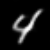

4


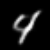

4


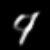

7


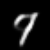

7


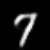

7


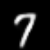

7


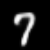

7


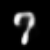

7


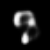

5


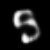

In [2]:
from IPython.display import display
import pickle
import pandas

[imgs, y] = pandas.read_pickle(open('LatentSpaceVisualization/Visuals/mnist_transitions.p', 'rb'))
for img, y_ in zip(imgs[:10], y[:10]):
    print(y_)
    display(img)

# Interactive Visualization

In [3]:
from ipywidgets import interact, fixed
import ipywidgets as widgets

@interact(imgs=fixed(imgs), y=fixed(y), i=widgets.IntSlider(min=0, max=len(y), step=1))
def mnist_video(imgs, y, i):
    print(y[i])
    return imgs[i].resize(size=[128, 128])

# Vectorize Data Points

In [47]:
from keras.preprocessing.image import img_to_array
import numpy as np

X = np.array([img_to_array(img) for img in imgs]) / 255.
X

array([[[[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]],

        ..., 
        [[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]]],


       [[[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
 

# Flatten the Images

In [48]:
X_flat = X.reshape(6_000, 50*50)
X_flat

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

# Define Keras Model

In [55]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=10, activation='softmax', input_shape=[50*50]))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                25010     
Total params: 25,010.0
Trainable params: 25,010
Non-trainable params: 0.0
_________________________________________________________________


# Prediction

In [56]:
x = X_flat[:10]
x

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

# Preprocessing Labels

In [57]:
from keras.utils.np_utils import to_categorical

Y = to_categorical(y)
Y

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.]])

# Define Callback

In [ ]:
from keras.callbacks import Callback

class HelloWorld(Callback):
    def on_train_begin(self, logs=None):
        print('Training has begun')

    def on_epoch_end(self, epoch, logs=None):
        print('Epoch ended')

# Fit the Model

In [70]:
history = model.fit(X_flat, Y, validation_split=.1, callbacks=[HelloWorld()])

Train on 5400 samples, validate on 600 samples
Training has begun
Epoch 1/10
5400/5400 [==============================] - 0s - loss: 0.4393 - acc: 0.8557 - val_loss: 0.8452 - val_acc: 0.7483
Epoch 2/10
5400/5400 [==============================] - 0s - loss: 0.4384 - acc: 0.8496 - val_loss: 0.8758 - val_acc: 0.7317
Epoch 3/10
5400/5400 [==============================] - 0s - loss: 0.4409 - acc: 0.8520 - val_loss: 0.8422 - val_acc: 0.7450
Epoch 4/10
5400/5400 [==============================] - 0s - loss: 0.4366 - acc: 0.8511 - val_loss: 0.8329 - val_acc: 0.7483
Epoch 5/10
5400/5400 [==============================] - 0s - loss: 0.4331 - acc: 0.8526 - val_loss: 0.8420 - val_acc: 0.7417
Epoch 6/10
5400/5400 [==============================] - 0s - loss: 0.4322 - acc: 0.8539 - val_loss: 0.8677 - val_acc: 0.7483
Epoch 7/10
5400/5400 [==============================] - 0s - loss: 0.4318 - acc: 0.8494 - val_loss: 0.8850 - val_acc: 0.7450
Epoch 8/10
5400/5400 [==============================] - 1s 

# Learning Curves

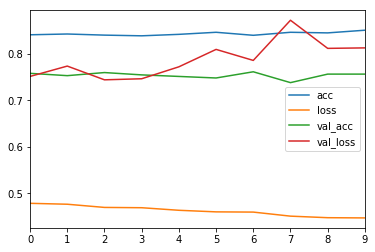

In [66]:
import pandas as pd
%matplotlib inline

pd.DataFrame(history.history).plot()

In [71]:
model.evaluate(X_flat, Y)

5952/6000 [============================>.] - ETA: 0s

[0.44865002059936521, 0.86083333333333334]